### Categorizando Imagens de vestuário com Redes Neurais Convolucionais
Nesse projeto vou utilizar Redes Neurais Convolucionais (CNNs) para extrair representações distinguíveis de imagens.
Vou desenvolver um classificador CNN utilizando o  TensorFlow para categorizar imagens de roupas de vestuário que existem em qualquer tipo de loja de magazine.
## Definição
Uma Rede Neural Convolucional (ConvNet / Convolutional Neural Network / CNN) é um algoritmo de Aprendizado Profundo que pode captar uma imagem de entrada, atribuir importância (pesos e vieses que podem ser aprendidos) a vários aspectos / objetos da imagem e ser capaz de diferenciar um do outro. O pré-processamento exigido em uma ConvNet é muito menor em comparação com outros algoritmos de classificação. Enquanto nos métodos primitivos os filtros são feitos à mão, com treinamento suficiente, as ConvNets têm a capacidade de aprender esses filtros / características.

A arquitetura de uma ConvNet é análoga àquela do padrão de conectividade de neurônios no cérebro humano e foi inspirada na organização do Visual Cortex. Os neurônios individuais respondem a estímulos apenas em uma região restrita do campo visual conhecida como Campo Receptivo. 
Fonte: [www.deeplearningbook.com.br](https://https://www.deeplearningbook.com.br/introducao-as-redes-neurais-convolucionais/)

Carregando os pacotes

In [43]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark


In [44]:
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
import numpy as np
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Celso Alves" --iversions

Author: Celso Alves

sys       : 3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0]
matplotlib: 3.2.2
numpy     : 1.19.5
IPython   : 5.5.0
tensorflow: 2.6.0
keras     : 2.6.0



## Dataset
O dataset desse projeto é o "The clothing Fashion-MNIST"  (https://github.com/zalandoresearch/fashion-mnist) ele consiste de 60.000 amostras de treino e 10.000 de teste. Cada amostra é uma imagem de 28x28 em escala de cinza associada com um label dividido em 10 classes a seguir:

0: T-shirt/top (Camiseta)<br>
1: Trouser (Calça)<br>
2: Pullover (Blusa)<br>
3: Dress( Vestido)<br>
4: Coat (Casaco)<br>
5: Sandal (Sandália)<br>
6: Shirt(Camisa)<br>
7: Sneaker( Tênis)<br>
8: Bag (Bolsa)<br>
9: Ankle boot (Sapato de Salto)<br>

O dataset pode ser baixado diretamente do link acima ou carregado diretamente do Keras

In [58]:
#carregando o dataset diretamente do keras
fashion_mnist = tf.keras.datasets.fashion_mnist
#atribuindo os dados a um array numpy
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [59]:
#Exibindo alguns labels do array numpy
print(train_labels)

[9 0 0 ... 3 0 5]


In [60]:
#The label arrays do not include class names. Hence, we define them as follows and will use them for plotting later on:
#O array numpy que contem os labels não tem os nomes das classes, vou criar abaixo uma lista para guardar os nomes: 
class_names = ['Camiseta/top', 'Calça', 'Blusa', 'Vestido', 'Casaco',
               'Sandália', 'Camisa', 'Tênis', 'Mochila/Bolsa', 'Sapato de Salto']


In [61]:
#Analizando o shape 
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


60.000 de treino , 10.000 de teste

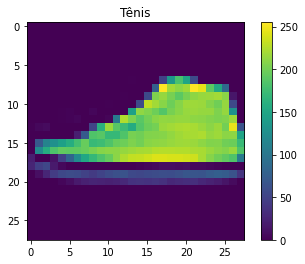

In [62]:
#analizando algumas amostras
plt.figure()
plt.imshow(train_images[41])
plt.colorbar()
plt.grid(False)
plt.title(class_names[train_labels[41]])
plt.show()



Na amostra do tênis acima, os valores dos pixels estão entre 0 e 255 . Portando , é necessário rescalonar o range de 0 para 1 para alimentar a rede neural, para é isso vou dividir os valores de treino e teste por 255.

In [63]:
train_images = train_images / 255.0
test_images = test_images / 255.0


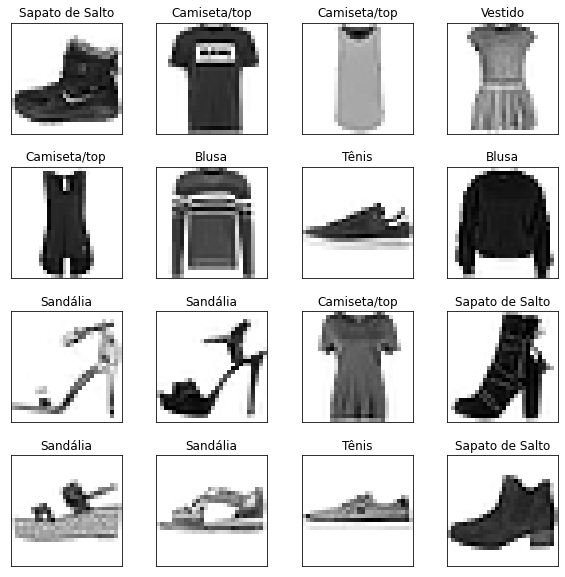

In [64]:
#Ajuste do tamanho da figura.
plt.figure(figsize=(10, 10))
#Loop para mostrar 16 amostras 
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.subplots_adjust(hspace=.3)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
plt.show()

## Classificando imagens com as CNNs


A camada convolucional no Keras pega apenas 3 dimensões em cada amostra individual, será necessário fazer um reshape para que os dados fiquem em 4 dimensões. 

In [65]:
X_train = train_images.reshape((train_images.shape[0], 28, 28, 1))
X_test = test_images.reshape((test_images.shape[0], 28, 28, 1))

print(X_train.shape)


(60000, 28, 28, 1)


In [66]:
#Ajustar o Set_seed para que o exemplo possa ser reproduzido 
tf.random.set_seed(42)

In [67]:
#Inicializando o modelo
model = models.Sequential()

In [68]:
#vou utilizar 3 camadas convolucionais , primeira camada com 32 filtros 3 * 3
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
#A segunda camada com filtros de 64 3*3 , ativação relu, igual acima
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Terceira camada com filtros 128 3*3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
#Camada Oculta com 64 nos
model.add(layers.Dense(64, activation='relu'))
#A camada de saida com 10 nós representando as 10 diferentes classes do dataset
model.add(layers.Dense(10, activation='softmax'))
#Compilando com o otimisador "Adam"
model.compile(optimizer='adam',
              loss=losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

Cada linha acima é uma camada que foi definida na célula e é mostrado o número de parametros treinaveis.

In [69]:
#Treinando o modelo que foi criado acima,vou usar 10 iterações e validar usando os dados teste.
%%time
model.fit(X_train, train_labels, validation_data=(X_test, test_labels), epochs=10)



Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.4740 - accuracy: 0.8249 - val_loss: 0.3390 - val_accuracy: 0.8805
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.3072 - accuracy: 0.8872 - val_loss: 0.3520 - val_accuracy: 0.8742
Epoch 3/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.2617 - accuracy: 0.9030 - val_loss: 0.2819 - val_accuracy: 0.8931
Epoch 4/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2312 - accuracy: 0.9141 - val_loss: 0.2735 - val_accuracy: 0.9038
Epoch 5/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.2063 - accuracy: 0.9236 - val_loss: 0.2651 - val_accuracy: 0.9036
Epoch 6/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.1824 - accuracy: 0.9316 - val_loss: 0.2697 - val_accuracy: 0.9045
Epoch 7/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.1626 - accuracy: 0.9381 - val_loss: 0.2780 -

O modelo conseguiu uma acurácia em torno de 91 % nos dados de treino


Com o modelo treinado vou fazer as predições

In [70]:
test_loss, test_acc = model.evaluate(X_test, test_labels, verbose=2)

print('Acurácia nos dados de teste:', test_acc)

predictions = model.predict(X_test)
print(predictions[0])


print('Label previsto para a primeira amostra do teste: ', np.argmax(predictions[0]))
print('Label real para a primeira amostra do teste: ',test_labels[0])

313/313 - 3s - loss: 0.3171 - accuracy: 0.9075
Acurácia nos dados de teste: 0.9075000286102295
[1.09344107e-13 9.27499050e-11 3.41278411e-13 1.85130963e-13
 3.74812638e-12 5.95031668e-09 4.88501553e-14 1.27352436e-07
 9.36891884e-12 9.99999881e-01]
Label previsto para a primeira amostra do teste:  9
Label real para a primeira amostra do teste:  9


Função para plotar a imagem de amostra e o resultado preditivo


In [71]:
def plot_image_prediction(i, images, predictions, labels, class_names):
    plt.subplot(1,2,1)
    plt.imshow(images[i], cmap=plt.cm.binary)
    prediction = np.argmax(predictions[i])
    # se estiver certo a predição eu printo azul, senão vermelho
    color = 'blue' if prediction == labels[i] else 'red'
    plt.title(f"{class_names[labels[i]]} (predicted {class_names[prediction]})", color=color)
    plt.subplot(1,2,2)
    plt.grid(False)
    plt.xticks(range(10))
    plot = plt.bar(range(10), predictions[i], color="#777777")
    plt.ylim([0, 1])
    plot[prediction].set_color('red')
    plot[labels[i]].set_color('blue')
    plt.show()

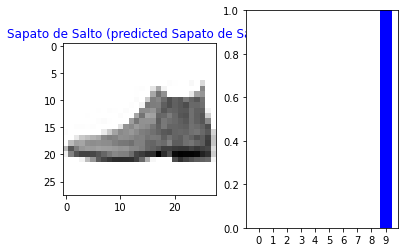

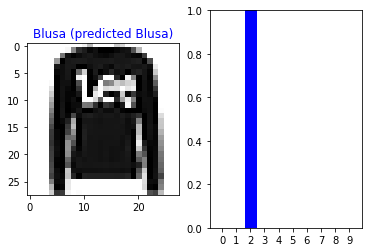

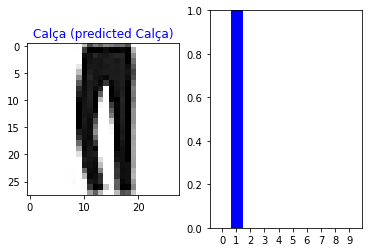

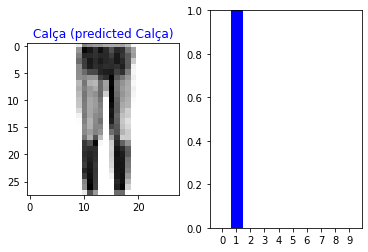

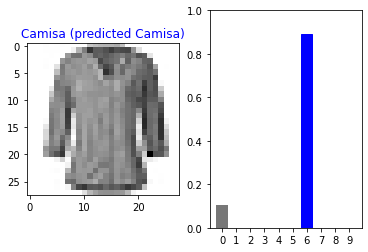

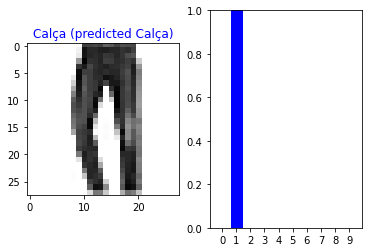

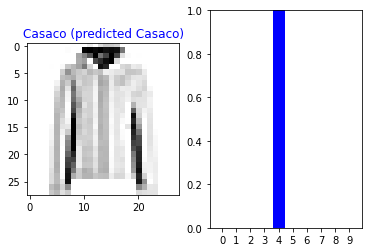

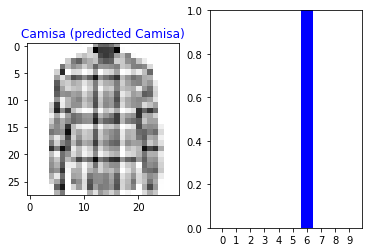

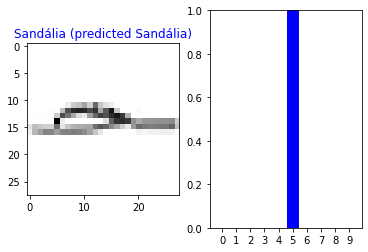

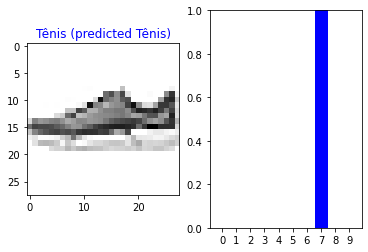

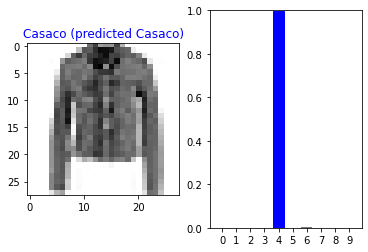

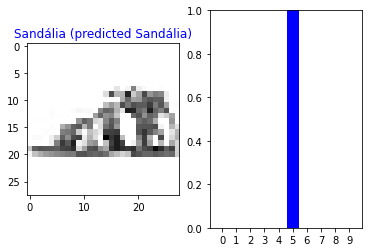

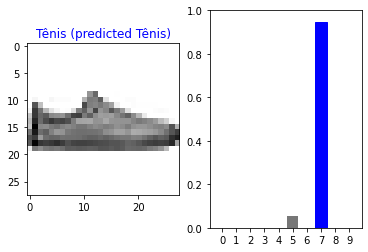

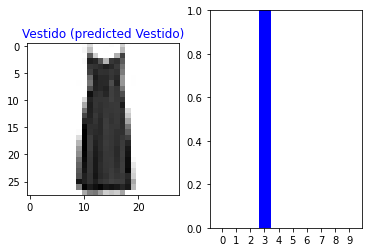

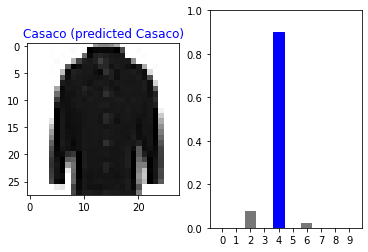

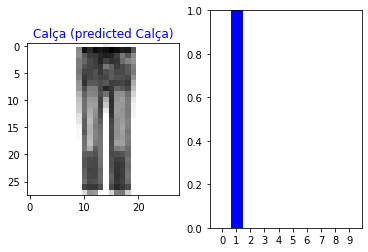

In [75]:
#chamar a função num loop para prever 16 valores
for i in range(16):
  plot_image_prediction(i, test_images, predictions, test_labels, class_names)

Todos os valores foram corretos! ;)

### Fim.
